In [1]:
!pip install sklearn
!pip install underthesea
!pip install langdetect
!pip install wordcloud

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=9a52194a170a2aa999ef9c59bea3059bbb4aa43d865c68e0f890e5224d68

In [2]:
import sklearn
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex
import re
import string
import time
import os
import pickle

from langdetect import detect
from collections import Counter
from underthesea import word_tokenize, pos_tag, sent_tokenize

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [4]:
file_path = '/content/gdrive/MyDrive/LDS0_k296_NgoTrieuPhu/Project_1/Data_Agoda_raw/hotel_comments.csv'

## Đọc dữ liệu

In [5]:
data = pd.read_csv(file_path, encoding="utf-8")

In [6]:
pd.set_option('display.max_colwidth', None)  # Hiển thị toàn bộ nội dung cột

In [7]:
data.head(5)

,num,Hotel ID,Reviewer ID,Reviewer Name,Nationality,Group Name,Room Type,Stay Details,Score,Score Level,Title,Body,Review Date
0,1,1_1,1_1_1,MARIKO,Nhật Bản,Cặp đôi,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,Đã ở 3 đêm vào Tháng 7 năm 2023,"10,0",Trên cả tuyệt vời,Cao nhất‼︎”,"Tôi đã ở cùng chủ nhân trong 4 đêm. Nhân viên rất thân thiện. Tầm nhìn từ phòng nhìn ra biển rộng lớn và tôi đã cảm động mỗi lần nhìn. Đặc biệt là bình minh rất tuyệt vời. Vì vậy, tôi khuyên bạn nên chọn phòng với tầm nhìn ra đại dương. Bãi biển chỉ cách đường băng qua đường. Hồ bơi rộng và rất thoải mái. Bữa sáng buffet có nhiều loại thức ăn và rất thú vị. Tôi đã dùng dịch vụ phòng ăn cho mỗi bữa ăn vì tôi lười đi ra ngoài. Trứng chiên cơm rất ngon. Tuy nhiên, khi đặt hàng, không có ai nói được tiếng Anh, vì vậy tôi phải gọi điện thoại và mỗi lần có người nói được tiếng Anh đến phòng. Tôi muốn ở lại đây nếu tôi quay lại Nha Trang. Cảm ơn nhân viên rất nhiều.",Đã nhận xét vào 30 tháng 7 2023
1,2,1_1,1_1_2,Hong,Việt Nam,Đi công tác,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,Đã ở 1 đêm vào Tháng 9 năm 2022,"10,0",Trên cả tuyệt vời,Tháng 8”,Lựa chọn Mường Thanh vì giá cả phù hợp. Đặt Online được nhiều ưu đãi. Bữa sáng khá phong phú và đầy đủ dưỡng chất. Món cà ri Tôm khách sạn mời rất ngon. Sinh nhật tôi được bạn Hồng chúc mừng sinh nhật và tạo bất ngờ tại phòng. Món nước welcome tại sảnh khi được check in các bạn mời rất ngon. Mỗi lần xuống sảnh đều uống các bạn đều nhiệt tình mời thêm. Các bạn Bell rất dể thương luôn giao tiếp và chào khách tại sảnh. Một nơi đáng lưu trú,Đã nhận xét vào 05 tháng 9 2022
2,3,1_1,1_1_3,Guai,Việt Nam,Cặp đôi,Deluxe Hướng biển giường đôi,Đã ở 1 đêm vào Tháng 6 năm 2024,"9,2",Trên cả tuyệt vời,Du lịch tại Nha Trang”,"Lần này đến với Nha Trang, tôi book phòng tại khách sạn Mường Thanh Luxury. Khách sạn trên đường Trần Phú, có view rất chill và thuận lợi để tắm biển. Nhân viên quầy lễ tân niềm nở, tận tình hướng dẫn, thủ tục nhận phòng đơn giản và nhanh chóng. Phòng ốc sạch sẽ đầy đủ tiện nghi, duy chỉ có thang máy lên xuống có vẻ hơi cũ kỹ và thường phải chờ đợi rất lâu. Ăn sáng tại khách sạn thì món ăn phong phú, nhưng lại không có các món đặc sản vùng miền như bún cá, nem nướng, bánh căn, bánh hỏi lòng heo các loại.",Đã nhận xét vào 25 tháng 6 2024
3,4,1_1,1_1_4,Nghĩa,Việt Nam,Gia đình có em bé,Deluxe Hướng biển giường đôi,Đã ở 3 đêm vào Tháng 6 năm 2024,"8,8",Tuyệt vời,Du lịch Nha Trang tại Mường Thanh”,"Hôm đi đến lúc về thì mọi thứ trong Khách sạn điều tuyết vời, Nhân viên đón tiép nhiệt tình, tiện nghi đầy đủ. Có trường hợp bữa đi du lịch ở Khách sạn thì dụng cụ trong phòng tắm bữa đầu điều có đầy đủ nhưng ngày 2 và ngày 3 không thấy bỏ thêm dụng cụ cho những ngày đó. Nên chỉ có ý kiến ở vấn đề này. Cảm ơn nhân viên và Khách sạn đã phục vụ nhiệt tình cho khách đi du lịch tại Nha Trang",Đã nhận xét vào 02 tháng 7 2024
4,5,1_1,1_1_5,Duc,Việt Nam,Cặp đôi,Deluxe 2 giường Hướng phố,Đã ở 1 đêm vào Tháng 6 năm 2024,"9,2",Trên cả tuyệt vời,Ks tốt !”,"Khách sạn có vị trí trung tâm và sát biển. Nhân viên vui vẻ, thân thiện, mình check-in gặp bạn tiếp tân tên Lĩnh và bạn nhận hành lý tên Hiếu hỗ trợ rất nhiệt tình ! Phòng khách sạn rộng rãi , thoáng, phòng view biển quá đẹp ! Điều mình không thích lắm là nhà hàng ăn sáng hơi nóng, đi đâu phải chờ thang máy khá lâu và bên trong thang máy không có máy lạnh. Lần sau đến Nha Trang mình cũng sẽ quay lại ks này.",Đã nhận xét vào 16 tháng 6 2024


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80314 entries, 0 to 80313
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   num            80314 non-null  int64 
 1   Hotel ID       80314 non-null  object
 2   Reviewer ID    80314 non-null  object
 3   Reviewer Name  80228 non-null  object
 4   Nationality    80314 non-null  object
 5   Group Name     80314 non-null  object
 6   Room Type      80314 non-null  object
 7   Stay Details   80314 non-null  object
 8   Score          80314 non-null  object
 9   Score Level    80314 non-null  object
 10  Title          80314 non-null  object
 11  Body           80272 non-null  object
 12  Review Date    80314 non-null  object
dtypes: int64(1), object(12)
memory usage: 8.0+ MB


In [9]:
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80314 entries, 0 to 80313
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   num            80314 non-null  int64 
 1   Hotel ID       80314 non-null  object
 2   Reviewer ID    80314 non-null  object
 3   Reviewer Name  80228 non-null  object
 4   Nationality    80314 non-null  object
 5   Group Name     80314 non-null  object
 6   Room Type      80314 non-null  object
 7   Stay Details   80314 non-null  object
 8   Score          80314 non-null  object
 9   Score Level    80314 non-null  object
 10  Title          80314 non-null  object
 11  Body           80272 non-null  object
 12  Review Date    80314 non-null  object
dtypes: int64(1), object(12)
memory usage: 8.0+ MB


## Chuẩn hóa dữ liệu

In [10]:
data['Stay'] = data['Stay Details'].str.extract(r'Đã ở (\d{1})')
data['year'] = data['Stay Details'].str.extract(r'năm (\d{4})')
data['month'] = data['Stay Details'].str.extract(r'Tháng (\d{1,2})')

In [11]:
data['Score'] = data['Score'].str.replace(',', '.').astype(float)
data['Stay'] = data['Stay'].str.replace(',', '.').astype(int)
data['month'] = data['month'].str.replace(',', '.').astype(int)
data['year'] = data['year'].str.replace(',', '.').astype(int)

In [12]:
data.drop(['num', 'Reviewer ID', 'Reviewer Name', 'Score Level', 'Title', 'Stay Details', 'Review Date'], axis=1, inplace=True)
data.head()

,Hotel ID,Nationality,Group Name,Room Type,Score,Body,Stay,year,month
0,1_1,Nhật Bản,Cặp đôi,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,"Tôi đã ở cùng chủ nhân trong 4 đêm. Nhân viên rất thân thiện. Tầm nhìn từ phòng nhìn ra biển rộng lớn và tôi đã cảm động mỗi lần nhìn. Đặc biệt là bình minh rất tuyệt vời. Vì vậy, tôi khuyên bạn nên chọn phòng với tầm nhìn ra đại dương. Bãi biển chỉ cách đường băng qua đường. Hồ bơi rộng và rất thoải mái. Bữa sáng buffet có nhiều loại thức ăn và rất thú vị. Tôi đã dùng dịch vụ phòng ăn cho mỗi bữa ăn vì tôi lười đi ra ngoài. Trứng chiên cơm rất ngon. Tuy nhiên, khi đặt hàng, không có ai nói được tiếng Anh, vì vậy tôi phải gọi điện thoại và mỗi lần có người nói được tiếng Anh đến phòng. Tôi muốn ở lại đây nếu tôi quay lại Nha Trang. Cảm ơn nhân viên rất nhiều.",3,2023,7
1,1_1,Việt Nam,Đi công tác,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,Lựa chọn Mường Thanh vì giá cả phù hợp. Đặt Online được nhiều ưu đãi. Bữa sáng khá phong phú và đầy đủ dưỡng chất. Món cà ri Tôm khách sạn mời rất ngon. Sinh nhật tôi được bạn Hồng chúc mừng sinh nhật và tạo bất ngờ tại phòng. Món nước welcome tại sảnh khi được check in các bạn mời rất ngon. Mỗi lần xuống sảnh đều uống các bạn đều nhiệt tình mời thêm. Các bạn Bell rất dể thương luôn giao tiếp và chào khách tại sảnh. Một nơi đáng lưu trú,1,2022,9
2,1_1,Việt Nam,Cặp đôi,Deluxe Hướng biển giường đôi,9.2,"Lần này đến với Nha Trang, tôi book phòng tại khách sạn Mường Thanh Luxury. Khách sạn trên đường Trần Phú, có view rất chill và thuận lợi để tắm biển. Nhân viên quầy lễ tân niềm nở, tận tình hướng dẫn, thủ tục nhận phòng đơn giản và nhanh chóng. Phòng ốc sạch sẽ đầy đủ tiện nghi, duy chỉ có thang máy lên xuống có vẻ hơi cũ kỹ và thường phải chờ đợi rất lâu. Ăn sáng tại khách sạn thì món ăn phong phú, nhưng lại không có các món đặc sản vùng miền như bún cá, nem nướng, bánh căn, bánh hỏi lòng heo các loại.",1,2024,6
3,1_1,Việt Nam,Gia đình có em bé,Deluxe Hướng biển giường đôi,8.8,"Hôm đi đến lúc về thì mọi thứ trong Khách sạn điều tuyết vời, Nhân viên đón tiép nhiệt tình, tiện nghi đầy đủ. Có trường hợp bữa đi du lịch ở Khách sạn thì dụng cụ trong phòng tắm bữa đầu điều có đầy đủ nhưng ngày 2 và ngày 3 không thấy bỏ thêm dụng cụ cho những ngày đó. Nên chỉ có ý kiến ở vấn đề này. Cảm ơn nhân viên và Khách sạn đã phục vụ nhiệt tình cho khách đi du lịch tại Nha Trang",3,2024,6
4,1_1,Việt Nam,Cặp đôi,Deluxe 2 giường Hướng phố,9.2,"Khách sạn có vị trí trung tâm và sát biển. Nhân viên vui vẻ, thân thiện, mình check-in gặp bạn tiếp tân tên Lĩnh và bạn nhận hành lý tên Hiếu hỗ trợ rất nhiệt tình ! Phòng khách sạn rộng rãi , thoáng, phòng view biển quá đẹp ! Điều mình không thích lắm là nhà hàng ăn sáng hơi nóng, đi đâu phải chờ thang máy khá lâu và bên trong thang máy không có máy lạnh. Lần sau đến Nha Trang mình cũng sẽ quay lại ks này.",1,2024,6


In [13]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80272 entries, 0 to 80313
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Hotel ID     80272 non-null  object 
 1   Nationality  80272 non-null  object 
 2   Group Name   80272 non-null  object 
 3   Room Type    80272 non-null  object 
 4   Score        80272 non-null  float64
 5   Body         80272 non-null  object 
 6   Stay         80272 non-null  int64  
 7   year         80272 non-null  int64  
 8   month        80272 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 6.1+ MB


In [14]:
data.isnull().any()

,0
Hotel ID,False
Nationality,False
Group Name,False
Room Type,False
Score,False
Body,False
Stay,False
year,False
month,False


In [15]:
data.head()

,Hotel ID,Nationality,Group Name,Room Type,Score,Body,Stay,year,month
0,1_1,Nhật Bản,Cặp đôi,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,"Tôi đã ở cùng chủ nhân trong 4 đêm. Nhân viên rất thân thiện. Tầm nhìn từ phòng nhìn ra biển rộng lớn và tôi đã cảm động mỗi lần nhìn. Đặc biệt là bình minh rất tuyệt vời. Vì vậy, tôi khuyên bạn nên chọn phòng với tầm nhìn ra đại dương. Bãi biển chỉ cách đường băng qua đường. Hồ bơi rộng và rất thoải mái. Bữa sáng buffet có nhiều loại thức ăn và rất thú vị. Tôi đã dùng dịch vụ phòng ăn cho mỗi bữa ăn vì tôi lười đi ra ngoài. Trứng chiên cơm rất ngon. Tuy nhiên, khi đặt hàng, không có ai nói được tiếng Anh, vì vậy tôi phải gọi điện thoại và mỗi lần có người nói được tiếng Anh đến phòng. Tôi muốn ở lại đây nếu tôi quay lại Nha Trang. Cảm ơn nhân viên rất nhiều.",3,2023,7
1,1_1,Việt Nam,Đi công tác,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,Lựa chọn Mường Thanh vì giá cả phù hợp. Đặt Online được nhiều ưu đãi. Bữa sáng khá phong phú và đầy đủ dưỡng chất. Món cà ri Tôm khách sạn mời rất ngon. Sinh nhật tôi được bạn Hồng chúc mừng sinh nhật và tạo bất ngờ tại phòng. Món nước welcome tại sảnh khi được check in các bạn mời rất ngon. Mỗi lần xuống sảnh đều uống các bạn đều nhiệt tình mời thêm. Các bạn Bell rất dể thương luôn giao tiếp và chào khách tại sảnh. Một nơi đáng lưu trú,1,2022,9
2,1_1,Việt Nam,Cặp đôi,Deluxe Hướng biển giường đôi,9.2,"Lần này đến với Nha Trang, tôi book phòng tại khách sạn Mường Thanh Luxury. Khách sạn trên đường Trần Phú, có view rất chill và thuận lợi để tắm biển. Nhân viên quầy lễ tân niềm nở, tận tình hướng dẫn, thủ tục nhận phòng đơn giản và nhanh chóng. Phòng ốc sạch sẽ đầy đủ tiện nghi, duy chỉ có thang máy lên xuống có vẻ hơi cũ kỹ và thường phải chờ đợi rất lâu. Ăn sáng tại khách sạn thì món ăn phong phú, nhưng lại không có các món đặc sản vùng miền như bún cá, nem nướng, bánh căn, bánh hỏi lòng heo các loại.",1,2024,6
3,1_1,Việt Nam,Gia đình có em bé,Deluxe Hướng biển giường đôi,8.8,"Hôm đi đến lúc về thì mọi thứ trong Khách sạn điều tuyết vời, Nhân viên đón tiép nhiệt tình, tiện nghi đầy đủ. Có trường hợp bữa đi du lịch ở Khách sạn thì dụng cụ trong phòng tắm bữa đầu điều có đầy đủ nhưng ngày 2 và ngày 3 không thấy bỏ thêm dụng cụ cho những ngày đó. Nên chỉ có ý kiến ở vấn đề này. Cảm ơn nhân viên và Khách sạn đã phục vụ nhiệt tình cho khách đi du lịch tại Nha Trang",3,2024,6
4,1_1,Việt Nam,Cặp đôi,Deluxe 2 giường Hướng phố,9.2,"Khách sạn có vị trí trung tâm và sát biển. Nhân viên vui vẻ, thân thiện, mình check-in gặp bạn tiếp tân tên Lĩnh và bạn nhận hành lý tên Hiếu hỗ trợ rất nhiệt tình ! Phòng khách sạn rộng rãi , thoáng, phòng view biển quá đẹp ! Điều mình không thích lắm là nhà hàng ăn sáng hơi nóng, đi đâu phải chờ thang máy khá lâu và bên trong thang máy không có máy lạnh. Lần sau đến Nha Trang mình cũng sẽ quay lại ks này.",1,2024,6


In [16]:
tmp = data.groupby('Nationality').size().reset_index(name='count').sort_values(by='count', ascending=False)
tmp.head(10)

,Nationality,count
95,Việt Nam,49405
39,Hàn Quốc,14441
35,Hoa Kỳ,2324
100,Úc,1746
52,Malaysia,1653
40,Hồng Kông,1528
87,Trung Quốc,1021
83,Thái Lan,995
96,Vương quốc Anh,916
21,Canada,873


In [17]:
tmp = data.groupby('Group Name').size().reset_index(name = 'count').sort_values(by='count', ascending=False)
tmp.head()

,Group Name,count
0,Cặp đôi,31059
2,Gia đình có em bé,20259
4,Nhóm,10765
1,Du lịch một mình,8938
3,Gia đình có trẻ em,6348


## Xử lý dữ liệu tiếng việt

In [18]:
#Lọc giữ lại các dòng tiếng việt
def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown"

In [19]:
data['Language'] = data['Body'].apply(detect_language)
data = data[data['Language'] == 'vi']

In [20]:
data.count()

,0
Hotel ID,41348
Nationality,41348
Group Name,41348
Room Type,41348
Score,41348
Body,41348
Stay,41348
year,41348
month,41348
Language,41348


In [21]:
##LOAD EMOJICON
file = open('/content/gdrive/MyDrive/LDS0_k296_NgoTrieuPhu/Project_1/files/emojicon.txt', 'r', encoding="utf8")
emoji_lst = file.read().split('\n')
emoji_dict = {}
for line in emoji_lst:
    key, value = line.split('\t')
    emoji_dict[key] = str(value)
file.close()
#################
#LOAD TEENCODE
file = open('/content/gdrive/MyDrive/LDS0_k296_NgoTrieuPhu/Project_1/files/teencode.txt', 'r', encoding="utf8")
teen_lst = file.read().split('\n')
teen_dict = {}
for line in teen_lst:
    key, value = line.split('\t')
    teen_dict[key] = str(value)
file.close()
###############
#LOAD TRANSLATE ENGLISH -> VNMESE
file = open('/content/gdrive/MyDrive/LDS0_k296_NgoTrieuPhu/Project_1/files/english-vnmese.txt', 'r', encoding="utf8")
english_lst = file.read().split('\n')
english_dict = {}
for line in english_lst:
    key, value = line.split('\t')
    english_dict[key] = str(value)
file.close()
################
#LOAD wrong words
file = open('/content/gdrive/MyDrive/LDS0_k296_NgoTrieuPhu/Project_1/files/wrong-word.txt', 'r', encoding="utf8")
wrong_lst = file.read().split('\n')
file.close()
#################
#LOAD STOPWORDS
file = open('/content/gdrive/MyDrive/LDS0_k296_NgoTrieuPhu/Project_1/files/vietnamese-stopwords.txt', 'r', encoding="utf8")
stopwords_lst = file.read().split('\n')
file.close()

In [65]:
def process_text(text, emoji_dict = emoji_lst, teen_dict = teen_lst, wrong_lst = wrong_lst):
    document = text.lower()
    document = document.replace("’",'')
    document = regex.sub(r'\.+', ".", document)
    new_sentence =''
    for sentence in sent_tokenize(document):
        # if not(sentence.isascii()):
        ###### DEL Punctuation & Numbers
        pattern = r'(?i)\b[a-záàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ]+\b'
        sentence = ' '.join(regex.findall(pattern,sentence))
        ###### CONVERT EMOJICON
        sentence = ''.join(emoji_dict[word]+' ' if word in emoji_dict else word for word in list(sentence))
        ###### CONVERT TEENCODE
        sentence = ' '.join(teen_dict[word] if word in teen_dict else word for word in sentence.split())

        ###### DEL wrong words
        sentence = ' '.join('' if word in wrong_lst else word for word in sentence.split())
        new_sentence = new_sentence+ sentence + '. '
    document = new_sentence
    #print(document)
    ###### DEL excess blank space
    document = regex.sub(r'\s+', ' ', document).strip()
    #...
    return document

In [66]:
data['Body_pre'] = data['Body'].apply(process_text)
data.drop('Language', axis=1, inplace=True)
data.head(2)

,Hotel ID,Nationality,Group Name,Room Type,Score,Body,Stay,year,month,Body_pre_remove,positive_words,negative_words,positive_count,negative_count,Tag,Body_pre
0,1_1,Nhật Bản,Cặp đôi,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,"Tôi đã ở cùng chủ nhân trong 4 đêm. Nhân viên rất thân thiện. Tầm nhìn từ phòng nhìn ra biển rộng lớn và tôi đã cảm động mỗi lần nhìn. Đặc biệt là bình minh rất tuyệt vời. Vì vậy, tôi khuyên bạn nên chọn phòng với tầm nhìn ra đại dương. Bãi biển chỉ cách đường băng qua đường. Hồ bơi rộng và rất thoải mái. Bữa sáng buffet có nhiều loại thức ăn và rất thú vị. Tôi đã dùng dịch vụ phòng ăn cho mỗi bữa ăn vì tôi lười đi ra ngoài. Trứng chiên cơm rất ngon. Tuy nhiên, khi đặt hàng, không có ai nói được tiếng Anh, vì vậy tôi phải gọi điện thoại và mỗi lần có người nói được tiếng Anh đến phòng. Tôi muốn ở lại đây nếu tôi quay lại Nha Trang. Cảm ơn nhân viên rất nhiều.",3,2023,7,chủ_nhân đêm . thân_thiện . tầm phòng biển rộng_lớn cảm_động . bình tuyệt_vời . khuyên phòng tầm đại_dương . bãi biển đường_băng đường . hồ bơi rộng thoải_mái . bữa thức_ăn thú_vị . dịch_vụ phòng bữa lười đi . trứng chiên cơm ._nhiên đặt_hàng tiếng điện_thoại tiếng phòng . . .,"[tuyệt_vời, thú_vị, thân_thiện, cảm_động, tuyệt, thoải_mái]",[],6,0,Positive,tôi đã ở cùng chủ nhân đêm. nhân viên rất thân thiện. tầm nhìn từ phòng nhìn biển rộng lớn và tôi đã cảm động mỗi lần nhìn. đặc biệt là bình rất tuyệt vời. vì vậy tôi khuyên bạn nên chọn phòng với tầm nhìn đại dương. bãi biển chỉ cách đường băng đường. hồ bơi rộng và rất thoải mái. bữa sáng có nhiều loại thức ăn và rất thú vị. tôi đã dùng dịch vụ phòng ăn cho mỗi bữa ăn vì tôi lười đi ngoài. trứng chiên cơm rất . nhiên đặt hàng không có nói được tiếng vì vậy tôi phải gọi điện thoại và mỗi lần có người nói được tiếng đến phòng. tôi muốn ở lại đây nếu tôi lại . cảm ơn nhân viên rất nhiều.
1,1_1,Việt Nam,Đi công tác,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,Lựa chọn Mường Thanh vì giá cả phù hợp. Đặt Online được nhiều ưu đãi. Bữa sáng khá phong phú và đầy đủ dưỡng chất. Món cà ri Tôm khách sạn mời rất ngon. Sinh nhật tôi được bạn Hồng chúc mừng sinh nhật và tạo bất ngờ tại phòng. Món nước welcome tại sảnh khi được check in các bạn mời rất ngon. Mỗi lần xuống sảnh đều uống các bạn đều nhiệt tình mời thêm. Các bạn Bell rất dể thương luôn giao tiếp và chào khách tại sảnh. Một nơi đáng lưu trú,1,2022,9,lựa_chọn mường giá_cả . online ưu_đãi . bữa khá_phú đầy_đủ dưỡng_chất . món cà_tôm khách_sạn mời . nhật hồng_chúc mừng_nhật phòng . món sảnh mời . sảnh uống nhiệt_tình mời . dể_thương tiếp chào_khách sảnh . lưu_trú .,[đầy_đủ],"[ồn, hư]",1,2,Neutral,lựa chọn mường vì giá cả phù hợp. đặt online được nhiều ưu đãi. bữa sáng khá phú và đầy đủ dưỡng chất. món cà tôm khách sạn mời rất . nhật tôi được bạn hồng chúc mừng nhật và tạo bất ngờ tại phòng. món nước tại sảnh được các bạn mời rất . mỗi lần xuống sảnh đều uống các bạn đều nhiệt tình mời thêm. các bạn rất dể thương luôn tiếp và chào khách tại sảnh. một nơi đáng lưu trú.
2,1_1,Việt Nam,Cặp đôi,Deluxe Hướng biển giường đôi,9.2,"Lần này đến với Nha Trang, tôi book phòng tại khách sạn Mường Thanh Luxury. Khách sạn trên đường Trần Phú, có view rất chill và thuận lợi để tắm biển. Nhân viên quầy lễ tân niềm nở, tận tình hướng dẫn, thủ tục nhận phòng đơn giản và nhanh chóng. Phòng ốc sạch sẽ đầy đủ tiện nghi, duy chỉ có thang máy lên xuống có vẻ hơi cũ kỹ và thường phải chờ đợi rất lâu. Ăn sáng tại khách sạn thì món ăn phong phú, nhưng lại không có các món đặc sản vùng miền như bún cá, nem nướng, bánh căn, bánh hỏi lòng heo các loại.",1,2024,6,phòng khách_sạn mường . khách_sạn đường trần_phú thuận_lợi tắm biển . quầy niềm_nở tận_tình hướng_dẫn thủ_tục phòng đơn_giản chóng . phòng_ốc sạch_sẽ đầy_đủ tiện máy hơi cũ_kỹ chờ_đợi . khách_sạn món ăn_phú món đặc_sản vùng_miền bún cá nướng bánh bánh hỏi_lòng .,"[sạch_sẽ, sạch, đầy_đủ, niềm_nở]","[cũ, hư, cũ_kỹ, chờ_đợi]",4,4,Neutral,lần này đến với tôi phòng tại khách sạn mường . khách sạn trên đường trần phú có rấ

In [67]:
# Chuẩn hóa unicode tiếng việt
def loaddicchar():
    uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
    unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"

    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic

# Đưa toàn bộ dữ liệu qua hàm này để chuẩn hóa lại
def covert_unicode(txt):
    dicchar = loaddicchar()
    return regex.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

In [68]:
data['Body_pre'] = data['Body_pre'].astype(str)
data['Body_pre_load'] = data['Body_pre'].apply(covert_unicode)
print(data.count())
data.drop('Body_pre', axis=1, inplace=True)
data.head()

Hotel ID           41348
Nationality        41348
Group Name         41348
Room Type          41348
Score              41348
Body               41348
Stay               41348
year               41348
month              41348
Body_pre_remove    41348
positive_words     41348
negative_words     41348
positive_count     41348
negative_count     41348
Tag                41348
Body_pre           41348
Body_pre_load      41348
dtype: int64


,Hotel ID,Nationality,Group Name,Room Type,Score,Body,Stay,year,month,Body_pre_remove,positive_words,negative_words,positive_count,negative_count,Tag,Body_pre_load
0,1_1,Nhật Bản,Cặp đôi,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,"Tôi đã ở cùng chủ nhân trong 4 đêm. Nhân viên rất thân thiện. Tầm nhìn từ phòng nhìn ra biển rộng lớn và tôi đã cảm động mỗi lần nhìn. Đặc biệt là bình minh rất tuyệt vời. Vì vậy, tôi khuyên bạn nên chọn phòng với tầm nhìn ra đại dương. Bãi biển chỉ cách đường băng qua đường. Hồ bơi rộng và rất thoải mái. Bữa sáng buffet có nhiều loại thức ăn và rất thú vị. Tôi đã dùng dịch vụ phòng ăn cho mỗi bữa ăn vì tôi lười đi ra ngoài. Trứng chiên cơm rất ngon. Tuy nhiên, khi đặt hàng, không có ai nói được tiếng Anh, vì vậy tôi phải gọi điện thoại và mỗi lần có người nói được tiếng Anh đến phòng. Tôi muốn ở lại đây nếu tôi quay lại Nha Trang. Cảm ơn nhân viên rất nhiều.",3,2023,7,chủ_nhân đêm . thân_thiện . tầm phòng biển rộng_lớn cảm_động . bình tuyệt_vời . khuyên phòng tầm đại_dương . bãi biển đường_băng đường . hồ bơi rộng thoải_mái . bữa thức_ăn thú_vị . dịch_vụ phòng bữa lười đi . trứng chiên cơm ._nhiên đặt_hàng tiếng điện_thoại tiếng phòng . . .,"[tuyệt_vời, thú_vị, thân_thiện, cảm_động, tuyệt, thoải_mái]",[],6,0,Positive,tôi đã ở cùng chủ nhân đêm. nhân viên rất thân thiện. tầm nhìn từ phòng nhìn biển rộng lớn và tôi đã cảm động mỗi lần nhìn. đặc biệt là bình rất tuyệt vời. vì vậy tôi khuyên bạn nên chọn phòng với tầm nhìn đại dương. bãi biển chỉ cách đường băng đường. hồ bơi rộng và rất thoải mái. bữa sáng có nhiều loại thức ăn và rất thú vị. tôi đã dùng dịch vụ phòng ăn cho mỗi bữa ăn vì tôi lười đi ngoài. trứng chiên cơm rất . nhiên đặt hàng không có nói được tiếng vì vậy tôi phải gọi điện thoại và mỗi lần có người nói được tiếng đến phòng. tôi muốn ở lại đây nếu tôi lại . cảm ơn nhân viên rất nhiều.
1,1_1,Việt Nam,Đi công tác,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,Lựa chọn Mường Thanh vì giá cả phù hợp. Đặt Online được nhiều ưu đãi. Bữa sáng khá phong phú và đầy đủ dưỡng chất. Món cà ri Tôm khách sạn mời rất ngon. Sinh nhật tôi được bạn Hồng chúc mừng sinh nhật và tạo bất ngờ tại phòng. Món nước welcome tại sảnh khi được check in các bạn mời rất ngon. Mỗi lần xuống sảnh đều uống các bạn đều nhiệt tình mời thêm. Các bạn Bell rất dể thương luôn giao tiếp và chào khách tại sảnh. Một nơi đáng lưu trú,1,2022,9,lựa_chọn mường giá_cả . online ưu_đãi . bữa khá_phú đầy_đủ dưỡng_chất . món cà_tôm khách_sạn mời . nhật hồng_chúc mừng_nhật phòng . món sảnh mời . sảnh uống nhiệt_tình mời . dể_thương tiếp chào_khách sảnh . lưu_trú .,[đầy_đủ],"[ồn, hư]",1,2,Neutral,lựa chọn mường vì giá cả phù hợp. đặt online được nhiều ưu đãi. bữa sáng khá phú và đầy đủ dưỡng chất. món cà tôm khách sạn mời rất . nhật tôi được bạn hồng chúc mừng nhật và tạo bất ngờ tại phòng. món nước tại sảnh được các bạn mời rất . mỗi lần xuống sảnh đều uống các bạn đều nhiệt tình mời thêm. các bạn rất dể thương luôn tiếp và chào khách tại sảnh. một nơi đáng lưu trú.
2,1_1,Việt Nam,Cặp đôi,Deluxe Hướng biển giường đôi,9.2,"Lần này đến với Nha Trang, tôi book phòng tại khách sạn Mường Thanh Luxury. Khách sạn trên đường Trần Phú, có view rất chill và thuận lợi để tắm biển. Nhân viên quầy lễ tân niềm nở, tận tình hướng dẫn, thủ tục nhận phòng đơn giản và nhanh chóng. Phòng ốc sạch sẽ đầy đủ tiện nghi, duy chỉ có thang máy lên xuống có vẻ hơi cũ kỹ và thường phải chờ đợi rất lâu. Ăn sáng tại khách sạn thì món ăn phong phú, nhưng lại không có các món đặc sản vùng miền như bún cá, nem nướng, bánh căn, bánh hỏi lòng heo các loại.",1,2024,6,phòng khách_sạn mường . khách_sạn đường trần_phú thuận_lợi tắm biển . quầy niềm_nở tận_tình hướng_dẫn thủ_tục phòng đơn_giản chóng . phòng_ốc sạch_sẽ đầy_đủ tiện máy hơi cũ_kỹ chờ_đợi . khách_sạn món ăn_phú món đặc_sản vùng_miền bún cá nướng bánh bánh hỏi_lòng .,"[sạch_sẽ, sạch, đầy_đủ, niềm_nở]","[cũ, hư, cũ_kỹ, chờ_đợi]",4,4,Neutral,lần này đến với tôi phòng tại khách sạn mường . khách sạn trên đường trần phú 

In [69]:
def process_special_word(text):
    # có thể có nhiều từ đặc biệt cần ráp lại với nhau
    new_text = ''
    text_lst = text.split()
    i= 0
    # không, chẳng, chả...
    if 'không' in text_lst:
        while i <= len(text_lst) - 1:
            word = text_lst[i]
            #print(word)
            #print(i)
            if  word == 'không':
                next_idx = i+1
                if next_idx <= len(text_lst) -1:
                    word = word +'_'+ text_lst[next_idx]
                i= next_idx + 1
            else:
                i = i+1
            new_text = new_text + word + ' '
    else:
        new_text = text
    return new_text.strip()

In [70]:
data['Body_pre_fea'] = data['Body_pre_load'].apply(process_special_word)
print(data.count())
data.drop('Body_pre_load', axis=1, inplace=True)
data.head()

Hotel ID           41348
Nationality        41348
Group Name         41348
Room Type          41348
Score              41348
Body               41348
Stay               41348
year               41348
month              41348
Body_pre_remove    41348
positive_words     41348
negative_words     41348
positive_count     41348
negative_count     41348
Tag                41348
Body_pre_load      41348
Body_pre_fea       41348
dtype: int64


,Hotel ID,Nationality,Group Name,Room Type,Score,Body,Stay,year,month,Body_pre_remove,positive_words,negative_words,positive_count,negative_count,Tag,Body_pre_fea
0,1_1,Nhật Bản,Cặp đôi,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,"Tôi đã ở cùng chủ nhân trong 4 đêm. Nhân viên rất thân thiện. Tầm nhìn từ phòng nhìn ra biển rộng lớn và tôi đã cảm động mỗi lần nhìn. Đặc biệt là bình minh rất tuyệt vời. Vì vậy, tôi khuyên bạn nên chọn phòng với tầm nhìn ra đại dương. Bãi biển chỉ cách đường băng qua đường. Hồ bơi rộng và rất thoải mái. Bữa sáng buffet có nhiều loại thức ăn và rất thú vị. Tôi đã dùng dịch vụ phòng ăn cho mỗi bữa ăn vì tôi lười đi ra ngoài. Trứng chiên cơm rất ngon. Tuy nhiên, khi đặt hàng, không có ai nói được tiếng Anh, vì vậy tôi phải gọi điện thoại và mỗi lần có người nói được tiếng Anh đến phòng. Tôi muốn ở lại đây nếu tôi quay lại Nha Trang. Cảm ơn nhân viên rất nhiều.",3,2023,7,chủ_nhân đêm . thân_thiện . tầm phòng biển rộng_lớn cảm_động . bình tuyệt_vời . khuyên phòng tầm đại_dương . bãi biển đường_băng đường . hồ bơi rộng thoải_mái . bữa thức_ăn thú_vị . dịch_vụ phòng bữa lười đi . trứng chiên cơm ._nhiên đặt_hàng tiếng điện_thoại tiếng phòng . . .,"[tuyệt_vời, thú_vị, thân_thiện, cảm_động, tuyệt, thoải_mái]",[],6,0,Positive,tôi đã ở cùng chủ nhân đêm. nhân viên rất thân thiện. tầm nhìn từ phòng nhìn biển rộng lớn và tôi đã cảm động mỗi lần nhìn. đặc biệt là bình rất tuyệt vời. vì vậy tôi khuyên bạn nên chọn phòng với tầm nhìn đại dương. bãi biển chỉ cách đường băng đường. hồ bơi rộng và rất thoải mái. bữa sáng có nhiều loại thức ăn và rất thú vị. tôi đã dùng dịch vụ phòng ăn cho mỗi bữa ăn vì tôi lười đi ngoài. trứng chiên cơm rất . nhiên đặt hàng không_có nói được tiếng vì vậy tôi phải gọi điện thoại và mỗi lần có người nói được tiếng đến phòng. tôi muốn ở lại đây nếu tôi lại . cảm ơn nhân viên rất nhiều.
1,1_1,Việt Nam,Đi công tác,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,Lựa chọn Mường Thanh vì giá cả phù hợp. Đặt Online được nhiều ưu đãi. Bữa sáng khá phong phú và đầy đủ dưỡng chất. Món cà ri Tôm khách sạn mời rất ngon. Sinh nhật tôi được bạn Hồng chúc mừng sinh nhật và tạo bất ngờ tại phòng. Món nước welcome tại sảnh khi được check in các bạn mời rất ngon. Mỗi lần xuống sảnh đều uống các bạn đều nhiệt tình mời thêm. Các bạn Bell rất dể thương luôn giao tiếp và chào khách tại sảnh. Một nơi đáng lưu trú,1,2022,9,lựa_chọn mường giá_cả . online ưu_đãi . bữa khá_phú đầy_đủ dưỡng_chất . món cà_tôm khách_sạn mời . nhật hồng_chúc mừng_nhật phòng . món sảnh mời . sảnh uống nhiệt_tình mời . dể_thương tiếp chào_khách sảnh . lưu_trú .,[đầy_đủ],"[ồn, hư]",1,2,Neutral,lựa chọn mường vì giá cả phù hợp. đặt online được nhiều ưu đãi. bữa sáng khá phú và đầy đủ dưỡng chất. món cà tôm khách sạn mời rất . nhật tôi được bạn hồng chúc mừng nhật và tạo bất ngờ tại phòng. món nước tại sảnh được các bạn mời rất . mỗi lần xuống sảnh đều uống các bạn đều nhiệt tình mời thêm. các bạn rất dể thương luôn tiếp và chào khách tại sảnh. một nơi đáng lưu trú.
2,1_1,Việt Nam,Cặp đôi,Deluxe Hướng biển giường đôi,9.2,"Lần này đến với Nha Trang, tôi book phòng tại khách sạn Mường Thanh Luxury. Khách sạn trên đường Trần Phú, có view rất chill và thuận lợi để tắm biển. Nhân viên quầy lễ tân niềm nở, tận tình hướng dẫn, thủ tục nhận phòng đơn giản và nhanh chóng. Phòng ốc sạch sẽ đầy đủ tiện nghi, duy chỉ có thang máy lên xuống có vẻ hơi cũ kỹ và thường phải chờ đợi rất lâu. Ăn sáng tại khách sạn thì món ăn phong phú, nhưng lại không có các món đặc sản vùng miền như bún cá, nem nướng, bánh căn, bánh hỏi lòng heo các loại.",1,2024,6,phòng khách_sạn mường . khách_sạn đường trần_phú thuận_lợi tắm biển . quầy niềm_nở tận_tình hướng_dẫn thủ_tục phòng đơn_giản chóng . phòng_ốc sạch_sẽ đầy_đủ tiện máy hơi cũ_kỹ chờ_đợi . khách_sạn món ăn_phú món đặc_sản vùng_miền bún cá nướng bánh bánh hỏi_lòng .,"[sạch_sẽ, sạch, đầy_đủ, niềm_nở]","[cũ, hư, cũ_kỹ, chờ_đợi]",4,4,Neutral,lần này đến với tôi phòng tại khách sạn mường . khách sạn trên đường trần phú c

In [71]:
def normalize_repeated_characters(text):
    # Thay thế mọi ký tự lặp liên tiếp bằng một ký tự đó
    # Ví dụ: "lònggggg" thành "lòng", "thiệtttt" thành "thiệt"
    return re.sub(r'(.)\1+', r'\1', text)

In [72]:
data['Body_pre_normi'] = data['Body_pre_fea'].apply(normalize_repeated_characters)
print(data.count())
data.drop('Body_pre_fea', axis=1, inplace=True)
data.head()

Hotel ID           41348
Nationality        41348
Group Name         41348
Room Type          41348
Score              41348
Body               41348
Stay               41348
year               41348
month              41348
Body_pre_remove    41348
positive_words     41348
negative_words     41348
positive_count     41348
negative_count     41348
Tag                41348
Body_pre_fea       41348
Body_pre_normi     41348
dtype: int64


,Hotel ID,Nationality,Group Name,Room Type,Score,Body,Stay,year,month,Body_pre_remove,positive_words,negative_words,positive_count,negative_count,Tag,Body_pre_normi
0,1_1,Nhật Bản,Cặp đôi,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,"Tôi đã ở cùng chủ nhân trong 4 đêm. Nhân viên rất thân thiện. Tầm nhìn từ phòng nhìn ra biển rộng lớn và tôi đã cảm động mỗi lần nhìn. Đặc biệt là bình minh rất tuyệt vời. Vì vậy, tôi khuyên bạn nên chọn phòng với tầm nhìn ra đại dương. Bãi biển chỉ cách đường băng qua đường. Hồ bơi rộng và rất thoải mái. Bữa sáng buffet có nhiều loại thức ăn và rất thú vị. Tôi đã dùng dịch vụ phòng ăn cho mỗi bữa ăn vì tôi lười đi ra ngoài. Trứng chiên cơm rất ngon. Tuy nhiên, khi đặt hàng, không có ai nói được tiếng Anh, vì vậy tôi phải gọi điện thoại và mỗi lần có người nói được tiếng Anh đến phòng. Tôi muốn ở lại đây nếu tôi quay lại Nha Trang. Cảm ơn nhân viên rất nhiều.",3,2023,7,chủ_nhân đêm . thân_thiện . tầm phòng biển rộng_lớn cảm_động . bình tuyệt_vời . khuyên phòng tầm đại_dương . bãi biển đường_băng đường . hồ bơi rộng thoải_mái . bữa thức_ăn thú_vị . dịch_vụ phòng bữa lười đi . trứng chiên cơm ._nhiên đặt_hàng tiếng điện_thoại tiếng phòng . . .,"[tuyệt_vời, thú_vị, thân_thiện, cảm_động, tuyệt, thoải_mái]",[],6,0,Positive,tôi đã ở cùng chủ nhân đêm. nhân viên rất thân thiện. tầm nhìn từ phòng nhìn biển rộng lớn và tôi đã cảm động mỗi lần nhìn. đặc biệt là bình rất tuyệt vời. vì vậy tôi khuyên bạn nên chọn phòng với tầm nhìn đại dương. bãi biển chỉ cách đường băng đường. hồ bơi rộng và rất thoải mái. bữa sáng có nhiều loại thức ăn và rất thú vị. tôi đã dùng dịch vụ phòng ăn cho mỗi bữa ăn vì tôi lười đi ngoài. trứng chiên cơm rất . nhiên đặt hàng không_có nói được tiếng vì vậy tôi phải gọi điện thoại và mỗi lần có người nói được tiếng đến phòng. tôi muốn ở lại đây nếu tôi lại . cảm ơn nhân viên rất nhiều.
1,1_1,Việt Nam,Đi công tác,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,Lựa chọn Mường Thanh vì giá cả phù hợp. Đặt Online được nhiều ưu đãi. Bữa sáng khá phong phú và đầy đủ dưỡng chất. Món cà ri Tôm khách sạn mời rất ngon. Sinh nhật tôi được bạn Hồng chúc mừng sinh nhật và tạo bất ngờ tại phòng. Món nước welcome tại sảnh khi được check in các bạn mời rất ngon. Mỗi lần xuống sảnh đều uống các bạn đều nhiệt tình mời thêm. Các bạn Bell rất dể thương luôn giao tiếp và chào khách tại sảnh. Một nơi đáng lưu trú,1,2022,9,lựa_chọn mường giá_cả . online ưu_đãi . bữa khá_phú đầy_đủ dưỡng_chất . món cà_tôm khách_sạn mời . nhật hồng_chúc mừng_nhật phòng . món sảnh mời . sảnh uống nhiệt_tình mời . dể_thương tiếp chào_khách sảnh . lưu_trú .,[đầy_đủ],"[ồn, hư]",1,2,Neutral,lựa chọn mường vì giá cả phù hợp. đặt online được nhiều ưu đãi. bữa sáng khá phú và đầy đủ dưỡng chất. món cà tôm khách sạn mời rất . nhật tôi được bạn hồng chúc mừng nhật và tạo bất ngờ tại phòng. món nước tại sảnh được các bạn mời rất . mỗi lần xuống sảnh đều uống các bạn đều nhiệt tình mời thêm. các bạn rất dể thương luôn tiếp và chào khách tại sảnh. một nơi đáng lưu trú.
2,1_1,Việt Nam,Cặp đôi,Deluxe Hướng biển giường đôi,9.2,"Lần này đến với Nha Trang, tôi book phòng tại khách sạn Mường Thanh Luxury. Khách sạn trên đường Trần Phú, có view rất chill và thuận lợi để tắm biển. Nhân viên quầy lễ tân niềm nở, tận tình hướng dẫn, thủ tục nhận phòng đơn giản và nhanh chóng. Phòng ốc sạch sẽ đầy đủ tiện nghi, duy chỉ có thang máy lên xuống có vẻ hơi cũ kỹ và thường phải chờ đợi rất lâu. Ăn sáng tại khách sạn thì món ăn phong phú, nhưng lại không có các món đặc sản vùng miền như bún cá, nem nướng, bánh căn, bánh hỏi lòng heo các loại.",1,2024,6,phòng khách_sạn mường . khách_sạn đường trần_phú thuận_lợi tắm biển . quầy niềm_nở tận_tình hướng_dẫn thủ_tục phòng đơn_giản chóng . phòng_ốc sạch_sẽ đầy_đủ tiện máy hơi cũ_kỹ chờ_đợi . khách_sạn món ăn_phú món đặc_sản vùng_miền bún cá nướng bánh bánh hỏi_lòng .,"[sạch_sẽ, sạch, đầy_đủ, niềm_nở]","[cũ, hư, cũ_kỹ, chờ_đợi]",4,4,Neutral,lần này đến với tôi phòng tại khách sạn mường . khách sạn trên đường trần phú

In [73]:
def process_postag_thesea(text):
    new_document = ''
    # text = text.encode('utf-8')
    for sentence in sent_tokenize(text):
        # if isinstance(sentence, bytes):
        #     sentence = sentence.decode('utf-8')
        sentence = sentence.replace('.', '')
        ###### POS tag
        lst_word_type = ['N', 'Np', 'A', 'AB', 'V', 'VB', 'VY', 'R']
        tokens = word_tokenize(sentence, format="text")
        pos_tags = pos_tag(process_special_word(tokens))
        print(pos_tags)
        sentence = ' '.join(word[0] if word[1].upper() in lst_word_type else '' for word in pos_tags)
        new_document += sentence + ' '
    ###### DEL excess blank space
    new_document = regex.sub(r'\s+', ' ', new_document).strip()
    return new_document

In [74]:
def process_postag_thesea(text):
    new_document = ''
    for sentence in sent_tokenize(text):
        sentence = sentence.replace('.','')
        ###### POS tag
        lst_word_type = ['N','Np','A','AB','V','VB','VY','R']
        # lst_word_type = ['A','AB','V','VB','VY','R']
        sentence = ' '.join( word[0] if word[1].upper() in lst_word_type else '' for word in pos_tag(process_special_word(word_tokenize(sentence, format="text"))))
        new_document = new_document + sentence + ' '
    ###### DEL excess blank space
    new_document = regex.sub(r'\s+', ' ', new_document).strip()
    return new_document

In [75]:
data['Body_pre_pos'] = data['Body_pre_normi'].apply(process_postag_thesea)
print(data.count())
data.drop('Body_pre_normi', axis=1, inplace=True)
data.head()

Hotel ID           41348
Nationality        41348
Group Name         41348
Room Type          41348
Score              41348
Body               41348
Stay               41348
year               41348
month              41348
Body_pre_remove    41348
positive_words     41348
negative_words     41348
positive_count     41348
negative_count     41348
Tag                41348
Body_pre_normi     41348
Body_pre_pro       41348
dtype: int64


,Hotel ID,Nationality,Group Name,Room Type,Score,Body,Stay,year,month,Body_pre_remove,positive_words,negative_words,positive_count,negative_count,Tag,Body_pre_pro
0,1_1,Nhật Bản,Cặp đôi,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,"Tôi đã ở cùng chủ nhân trong 4 đêm. Nhân viên rất thân thiện. Tầm nhìn từ phòng nhìn ra biển rộng lớn và tôi đã cảm động mỗi lần nhìn. Đặc biệt là bình minh rất tuyệt vời. Vì vậy, tôi khuyên bạn nên chọn phòng với tầm nhìn ra đại dương. Bãi biển chỉ cách đường băng qua đường. Hồ bơi rộng và rất thoải mái. Bữa sáng buffet có nhiều loại thức ăn và rất thú vị. Tôi đã dùng dịch vụ phòng ăn cho mỗi bữa ăn vì tôi lười đi ra ngoài. Trứng chiên cơm rất ngon. Tuy nhiên, khi đặt hàng, không có ai nói được tiếng Anh, vì vậy tôi phải gọi điện thoại và mỗi lần có người nói được tiếng Anh đến phòng. Tôi muốn ở lại đây nếu tôi quay lại Nha Trang. Cảm ơn nhân viên rất nhiều.",3,2023,7,chủ_nhân đêm . thân_thiện . tầm phòng biển rộng_lớn cảm_động . bình tuyệt_vời . khuyên phòng tầm đại_dương . bãi biển đường_băng đường . hồ bơi rộng thoải_mái . bữa thức_ăn thú_vị . dịch_vụ phòng bữa lười đi . trứng chiên cơm ._nhiên đặt_hàng tiếng điện_thoại tiếng phòng . . .,"[tuyệt_vời, thú_vị, thân_thiện, cảm_động, tuyệt, thoải_mái]",[],6,0,Positive,đã ở cùng chủ_nhân đêm nhân_viên rất thân_thiện tầm nhìn phòng nhìn biển rộng_lớn đã cảm_động lần nhìn đặc_biệt là bình rất tuyệt_vời vì_vậy khuyên bạn chọn phòng tầm nhìn bãi biển chỉ cách đường_băng đường hồ bơi rộng rất thoải_mái bữa sáng có nhiều loại thức_ăn rất thú_vị đã dùng dịch_vụ phòng ăn bữa ăn lười đi trứng chiên cơm rất nhiên đặt_hàng không_có nói được tiếng vì_vậy phải gọi điện_thoại lần có người nói được tiếng đến muốn ở lại lại cảm_ơn nhân_viên rất nhiều
1,1_1,Việt Nam,Đi công tác,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,Lựa chọn Mường Thanh vì giá cả phù hợp. Đặt Online được nhiều ưu đãi. Bữa sáng khá phong phú và đầy đủ dưỡng chất. Món cà ri Tôm khách sạn mời rất ngon. Sinh nhật tôi được bạn Hồng chúc mừng sinh nhật và tạo bất ngờ tại phòng. Món nước welcome tại sảnh khi được check in các bạn mời rất ngon. Mỗi lần xuống sảnh đều uống các bạn đều nhiệt tình mời thêm. Các bạn Bell rất dể thương luôn giao tiếp và chào khách tại sảnh. Một nơi đáng lưu trú,1,2022,9,lựa_chọn mường giá_cả . online ưu_đãi . bữa khá_phú đầy_đủ dưỡng_chất . món cà_tôm khách_sạn mời . nhật hồng_chúc mừng_nhật phòng . món sảnh mời . sảnh uống nhiệt_tình mời . dể_thương tiếp chào_khách sảnh . lưu_trú .,[đầy_đủ],"[ồn, hư]",1,2,Neutral,lựa_chọn mường giá_cả đặt online được nhiều ưu_đãi bữa sáng đầy_đủ dưỡng chất món cà_tôm khách_sạn mời rất nhật được bạn hồng_chúc mừng_nhật tạo bất_ngờ phòng món nước sảnh được bạn mời rất lần xuống sảnh đều uống bạn đều nhiệt_tình mời thêm bạn rất dể_thương luôn tiếp chào_khách nơi đáng lưu_trú
2,1_1,Việt Nam,Cặp đôi,Deluxe Hướng biển giường đôi,9.2,"Lần này đến với Nha Trang, tôi book phòng tại khách sạn Mường Thanh Luxury. Khách sạn trên đường Trần Phú, có view rất chill và thuận lợi để tắm biển. Nhân viên quầy lễ tân niềm nở, tận tình hướng dẫn, thủ tục nhận phòng đơn giản và nhanh chóng. Phòng ốc sạch sẽ đầy đủ tiện nghi, duy chỉ có thang máy lên xuống có vẻ hơi cũ kỹ và thường phải chờ đợi rất lâu. Ăn sáng tại khách sạn thì món ăn phong phú, nhưng lại không có các món đặc sản vùng miền như bún cá, nem nướng, bánh căn, bánh hỏi lòng heo các loại.",1,2024,6,phòng khách_sạn mường . khách_sạn đường trần_phú thuận_lợi tắm biển . quầy niềm_nở tận_tình hướng_dẫn thủ_tục phòng đơn_giản chóng . phòng_ốc sạch_sẽ đầy_đủ tiện máy hơi cũ_kỹ chờ_đợi . khách_sạn món ăn_phú món đặc_sản vùng_miền bún cá nướng bánh bánh hỏi_lòng .,"[sạch_sẽ, sạch, đầy_đủ, niềm_nở]","[cũ, hư, cũ_kỹ, chờ_đợi]",4,4,Neutral,lần đến phòng khách_sạn khách_sạn đường trần_phú có rất thuận_lợi tắm biển nhân_viên quầy lễ_tân niềm_nở tận_tình hướng_dẫn thủ_tục nhận phòng đơn_giản phòng_ốc sạch_sẽ đầy_đủ tiện chỉ có máy lên_xuống có_vẻ hơi cũ_kỹ thường phải chờ_đợi rất lâu ăn sáng khách_sạn món ăn_phú lại

In [77]:
def remove_stopword(text, stopwords = stopwords_lst):
    ###### REMOVE stop words
    document = ' '.join('' if word in stopwords else word for word in text.split())
    #print(document)
    ###### DEL excess blank space
    document = regex.sub(r'\s+', ' ', document).strip()
    return document

In [80]:
data['Body_pre_remove'] = data['Body_pre_pos'].apply(remove_stopword)
print(data.count())
data.drop('Body_pre_pos', axis=1, inplace=True)
data.head(2)

Hotel ID           41348
Nationality        41348
Group Name         41348
Room Type          41348
Score              41348
Body               41348
Stay               41348
year               41348
month              41348
Body_pre_remove    41348
positive_words     41348
negative_words     41348
positive_count     41348
negative_count     41348
Tag                41348
Body_pre_pro       41348
dtype: int64


,Hotel ID,Nationality,Group Name,Room Type,Score,Body,Stay,year,month,Body_pre_remove,positive_words,negative_words,positive_count,negative_count,Tag
0,1_1,Nhật Bản,Cặp đôi,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,"Tôi đã ở cùng chủ nhân trong 4 đêm. Nhân viên rất thân thiện. Tầm nhìn từ phòng nhìn ra biển rộng lớn và tôi đã cảm động mỗi lần nhìn. Đặc biệt là bình minh rất tuyệt vời. Vì vậy, tôi khuyên bạn nên chọn phòng với tầm nhìn ra đại dương. Bãi biển chỉ cách đường băng qua đường. Hồ bơi rộng và rất thoải mái. Bữa sáng buffet có nhiều loại thức ăn và rất thú vị. Tôi đã dùng dịch vụ phòng ăn cho mỗi bữa ăn vì tôi lười đi ra ngoài. Trứng chiên cơm rất ngon. Tuy nhiên, khi đặt hàng, không có ai nói được tiếng Anh, vì vậy tôi phải gọi điện thoại và mỗi lần có người nói được tiếng Anh đến phòng. Tôi muốn ở lại đây nếu tôi quay lại Nha Trang. Cảm ơn nhân viên rất nhiều.",3,2023,7,chủ_nhân đêm thân_thiện tầm phòng biển rộng_lớn cảm_động bình tuyệt_vời khuyên phòng tầm bãi biển đường_băng đường hồ bơi rộng thoải_mái bữa thức_ăn thú_vị dịch_vụ phòng bữa lười đi trứng chiên cơm nhiên đặt_hàng tiếng điện_thoại tiếng,"[tuyệt_vời, thú_vị, thân_thiện, cảm_động, tuyệt, thoải_mái]",[],6,0,Positive
1,1_1,Việt Nam,Đi công tác,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,Lựa chọn Mường Thanh vì giá cả phù hợp. Đặt Online được nhiều ưu đãi. Bữa sáng khá phong phú và đầy đủ dưỡng chất. Món cà ri Tôm khách sạn mời rất ngon. Sinh nhật tôi được bạn Hồng chúc mừng sinh nhật và tạo bất ngờ tại phòng. Món nước welcome tại sảnh khi được check in các bạn mời rất ngon. Mỗi lần xuống sảnh đều uống các bạn đều nhiệt tình mời thêm. Các bạn Bell rất dể thương luôn giao tiếp và chào khách tại sảnh. Một nơi đáng lưu trú,1,2022,9,lựa_chọn mường giá_cả online ưu_đãi bữa đầy_đủ dưỡng chất món cà_tôm khách_sạn mời nhật hồng_chúc mừng_nhật phòng món sảnh mời sảnh uống nhiệt_tình mời dể_thương tiếp chào_khách lưu_trú,[đầy_đủ],"[ồn, hư]",1,2,Neutral
2,1_1,Việt Nam,Cặp đôi,Deluxe Hướng biển giường đôi,9.2,"Lần này đến với Nha Trang, tôi book phòng tại khách sạn Mường Thanh Luxury. Khách sạn trên đường Trần Phú, có view rất chill và thuận lợi để tắm biển. Nhân viên quầy lễ tân niềm nở, tận tình hướng dẫn, thủ tục nhận phòng đơn giản và nhanh chóng. Phòng ốc sạch sẽ đầy đủ tiện nghi, duy chỉ có thang máy lên xuống có vẻ hơi cũ kỹ và thường phải chờ đợi rất lâu. Ăn sáng tại khách sạn thì món ăn phong phú, nhưng lại không có các món đặc sản vùng miền như bún cá, nem nướng, bánh căn, bánh hỏi lòng heo các loại.",1,2024,6,phòng khách_sạn khách_sạn đường trần_phú thuận_lợi tắm biển quầy niềm_nở tận_tình hướng_dẫn thủ_tục phòng đơn_giản phòng_ốc sạch_sẽ đầy_đủ tiện máy hơi cũ_kỹ chờ_đợi khách_sạn món ăn_phú món đặc_sản vùng_miền bún cá nướng bánh bánh hỏi_lòng,"[sạch_sẽ, sạch, đầy_đủ, niềm_nở]","[cũ, hư, cũ_kỹ, chờ_đợi]",4,4,Neutral
3,1_1,Việt Nam,Gia đình có em bé,Deluxe Hướng biển giường đôi,8.8,"Hôm đi đến lúc về thì mọi thứ trong Khách sạn điều tuyết vời, Nhân viên đón tiép nhiệt tình, tiện nghi đầy đủ. Có trường hợp bữa đi du lịch ở Khách sạn thì dụng cụ trong phòng tắm bữa đầu điều có đầy đủ nhưng ngày 2 và ngày 3 không thấy bỏ thêm dụng cụ cho những ngày đó. Nên chỉ có ý kiến ở vấn đề này. Cảm ơn nhân viên và Khách sạn đã phục vụ nhiệt tình cho khách đi du lịch tại Nha Trang",3,2024,6,hôm đi khách_sạn điều_tuyết vời đón tiép nhiệt_tình_tiện trường_hợp bữa đi lịch khách_sạn dụng_cụ phòng tắm bữa đầu đầy_đủ dụng_cụ ý_kiến khách_sạn phục_vụ nhiệt_tình đi lịch,"[phục_vụ, đầy_đủ]",[],2,0,Neutral
4,1_1,Việt Nam,Cặp đôi,Deluxe 2 giường Hướng phố,9.2,"Khách sạn có vị trí trung tâm và sát biển. Nhân viên vui vẻ, thân thiện, mình check-in gặp bạn tiếp tân tên Lĩnh và bạn nhận hành lý tên Hiếu hỗ trợ rất nhiệt tình ! Phòng khách sạn rộng rãi , thoáng, phòng view biển quá đẹp ! Điều mình không thích lắm là nhà hàng ăn sáng hơi nóng, đi đâu phải chờ thang máy khá lâu và bên trong thang máy không có máy lạnh. Lần sau đến Nha Trang mình cũng sẽ quay lại ks này.",1,2024,6,khách_

## Tạo cột 'Tag' chứa 'Positive'/'Negative'/'Neutral' làm label cho model

In [81]:
file = open('/content/gdrive/MyDrive/LDS0_k296_NgoTrieuPhu/Project_1/files/positive_words.txt', 'r', encoding="utf8")
positive_words = file.read().split('\n')
file.close()

file = open('/content/gdrive/MyDrive/LDS0_k296_NgoTrieuPhu/Project_1/files/negative_words.txt', 'r', encoding="utf8")
negative_words = file.read().split('\n')
file.close()

def find_posi_words(document):
    word_list = []

    for word in positive_words:
        if word in document:
            word_list.append(word)

    return word_list

def find_nega_words(document):
    word_list = []

    for word in negative_words:
        if word in document:
            word_list.append(word)

    return word_list

In [82]:
data['positive_words'] = data['Body_pre_remove'].apply(find_posi_words)
data['negative_words'] = data['Body_pre_remove'].apply(find_nega_words)

data['positive_count'] = data['positive_words'].apply(len)
data['negative_count'] = data['negative_words'].apply(len)

data.head(2)

,Hotel ID,Nationality,Group Name,Room Type,Score,Body,Stay,year,month,Body_pre_remove,positive_words,negative_words,positive_count,negative_count,Tag
0,1_1,Nhật Bản,Cặp đôi,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,"Tôi đã ở cùng chủ nhân trong 4 đêm. Nhân viên rất thân thiện. Tầm nhìn từ phòng nhìn ra biển rộng lớn và tôi đã cảm động mỗi lần nhìn. Đặc biệt là bình minh rất tuyệt vời. Vì vậy, tôi khuyên bạn nên chọn phòng với tầm nhìn ra đại dương. Bãi biển chỉ cách đường băng qua đường. Hồ bơi rộng và rất thoải mái. Bữa sáng buffet có nhiều loại thức ăn và rất thú vị. Tôi đã dùng dịch vụ phòng ăn cho mỗi bữa ăn vì tôi lười đi ra ngoài. Trứng chiên cơm rất ngon. Tuy nhiên, khi đặt hàng, không có ai nói được tiếng Anh, vì vậy tôi phải gọi điện thoại và mỗi lần có người nói được tiếng Anh đến phòng. Tôi muốn ở lại đây nếu tôi quay lại Nha Trang. Cảm ơn nhân viên rất nhiều.",3,2023,7,chủ_nhân đêm thân_thiện tầm phòng biển rộng_lớn cảm_động bình tuyệt_vời khuyên phòng tầm bãi biển đường_băng đường hồ bơi rộng thoải_mái bữa thức_ăn thú_vị dịch_vụ phòng bữa lười đi trứng chiên cơm nhiên đặt_hàng tiếng điện_thoại tiếng,"[tuyệt_vời, thú_vị, thân_thiện, cảm_động, tuyệt, thoải_mái]",[],6,0,Positive
1,1_1,Việt Nam,Đi công tác,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,Lựa chọn Mường Thanh vì giá cả phù hợp. Đặt Online được nhiều ưu đãi. Bữa sáng khá phong phú và đầy đủ dưỡng chất. Món cà ri Tôm khách sạn mời rất ngon. Sinh nhật tôi được bạn Hồng chúc mừng sinh nhật và tạo bất ngờ tại phòng. Món nước welcome tại sảnh khi được check in các bạn mời rất ngon. Mỗi lần xuống sảnh đều uống các bạn đều nhiệt tình mời thêm. Các bạn Bell rất dể thương luôn giao tiếp và chào khách tại sảnh. Một nơi đáng lưu trú,1,2022,9,lựa_chọn mường giá_cả online ưu_đãi bữa đầy_đủ dưỡng chất món cà_tôm khách_sạn mời nhật hồng_chúc mừng_nhật phòng món sảnh mời sảnh uống nhiệt_tình mời dể_thương tiếp chào_khách lưu_trú,[đầy_đủ],"[ồn, hư]",1,2,Neutral
2,1_1,Việt Nam,Cặp đôi,Deluxe Hướng biển giường đôi,9.2,"Lần này đến với Nha Trang, tôi book phòng tại khách sạn Mường Thanh Luxury. Khách sạn trên đường Trần Phú, có view rất chill và thuận lợi để tắm biển. Nhân viên quầy lễ tân niềm nở, tận tình hướng dẫn, thủ tục nhận phòng đơn giản và nhanh chóng. Phòng ốc sạch sẽ đầy đủ tiện nghi, duy chỉ có thang máy lên xuống có vẻ hơi cũ kỹ và thường phải chờ đợi rất lâu. Ăn sáng tại khách sạn thì món ăn phong phú, nhưng lại không có các món đặc sản vùng miền như bún cá, nem nướng, bánh căn, bánh hỏi lòng heo các loại.",1,2024,6,phòng khách_sạn khách_sạn đường trần_phú thuận_lợi tắm biển quầy niềm_nở tận_tình hướng_dẫn thủ_tục phòng đơn_giản phòng_ốc sạch_sẽ đầy_đủ tiện máy hơi cũ_kỹ chờ_đợi khách_sạn món ăn_phú món đặc_sản vùng_miền bún cá nướng bánh bánh hỏi_lòng,"[sạch_sẽ, sạch, đầy_đủ, niềm_nở]","[cũ, hư, cũ_kỹ, chờ_đợi]",4,4,Neutral


In [83]:
def sentiment_analysis(row):
    score = row['Score']
    positive_count = row['positive_count']
    negative_count = row['negative_count']

    if score < 7.0:
        return 'Negative'
    elif score >= 9.0 and (positive_count   - negative_count) > 0:
        return 'Positive'
    elif score >= 9.0 and (positive_count - negative_count) <= 0:
        return 'Neutral'
    elif score < 9.0 and (positive_count - negative_count) >= 0:
        return 'Neutral'
    elif score < 9.0 and (positive_count - negative_count) < 0:
        return 'Negative'

# Áp dụng hàm sentiment_analysis trên từng hàng
data['Tag'] = data.apply(sentiment_analysis, axis = 1)
data.head(2)

,Hotel ID,Nationality,Group Name,Room Type,Score,Body,Stay,year,month,Body_pre_remove,positive_words,negative_words,positive_count,negative_count,Tag
0,1_1,Nhật Bản,Cặp đôi,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,"Tôi đã ở cùng chủ nhân trong 4 đêm. Nhân viên rất thân thiện. Tầm nhìn từ phòng nhìn ra biển rộng lớn và tôi đã cảm động mỗi lần nhìn. Đặc biệt là bình minh rất tuyệt vời. Vì vậy, tôi khuyên bạn nên chọn phòng với tầm nhìn ra đại dương. Bãi biển chỉ cách đường băng qua đường. Hồ bơi rộng và rất thoải mái. Bữa sáng buffet có nhiều loại thức ăn và rất thú vị. Tôi đã dùng dịch vụ phòng ăn cho mỗi bữa ăn vì tôi lười đi ra ngoài. Trứng chiên cơm rất ngon. Tuy nhiên, khi đặt hàng, không có ai nói được tiếng Anh, vì vậy tôi phải gọi điện thoại và mỗi lần có người nói được tiếng Anh đến phòng. Tôi muốn ở lại đây nếu tôi quay lại Nha Trang. Cảm ơn nhân viên rất nhiều.",3,2023,7,chủ_nhân đêm thân_thiện tầm phòng biển rộng_lớn cảm_động bình tuyệt_vời khuyên phòng tầm bãi biển đường_băng đường hồ bơi rộng thoải_mái bữa thức_ăn thú_vị dịch_vụ phòng bữa lười đi trứng chiên cơm nhiên đặt_hàng tiếng điện_thoại tiếng,"[tuyệt_vời, thú_vị, thân_thiện, cảm_động, tuyệt, thoải_mái]",[],6,0,Positive
1,1_1,Việt Nam,Đi công tác,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,Lựa chọn Mường Thanh vì giá cả phù hợp. Đặt Online được nhiều ưu đãi. Bữa sáng khá phong phú và đầy đủ dưỡng chất. Món cà ri Tôm khách sạn mời rất ngon. Sinh nhật tôi được bạn Hồng chúc mừng sinh nhật và tạo bất ngờ tại phòng. Món nước welcome tại sảnh khi được check in các bạn mời rất ngon. Mỗi lần xuống sảnh đều uống các bạn đều nhiệt tình mời thêm. Các bạn Bell rất dể thương luôn giao tiếp và chào khách tại sảnh. Một nơi đáng lưu trú,1,2022,9,lựa_chọn mường giá_cả online ưu_đãi bữa đầy_đủ dưỡng chất món cà_tôm khách_sạn mời nhật hồng_chúc mừng_nhật phòng món sảnh mời sảnh uống nhiệt_tình mời dể_thương tiếp chào_khách lưu_trú,[đầy_đủ],"[ồn, hư]",1,2,Neutral
2,1_1,Việt Nam,Cặp đôi,Deluxe Hướng biển giường đôi,9.2,"Lần này đến với Nha Trang, tôi book phòng tại khách sạn Mường Thanh Luxury. Khách sạn trên đường Trần Phú, có view rất chill và thuận lợi để tắm biển. Nhân viên quầy lễ tân niềm nở, tận tình hướng dẫn, thủ tục nhận phòng đơn giản và nhanh chóng. Phòng ốc sạch sẽ đầy đủ tiện nghi, duy chỉ có thang máy lên xuống có vẻ hơi cũ kỹ và thường phải chờ đợi rất lâu. Ăn sáng tại khách sạn thì món ăn phong phú, nhưng lại không có các món đặc sản vùng miền như bún cá, nem nướng, bánh căn, bánh hỏi lòng heo các loại.",1,2024,6,phòng khách_sạn khách_sạn đường trần_phú thuận_lợi tắm biển quầy niềm_nở tận_tình hướng_dẫn thủ_tục phòng đơn_giản phòng_ốc sạch_sẽ đầy_đủ tiện máy hơi cũ_kỹ chờ_đợi khách_sạn món ăn_phú món đặc_sản vùng_miền bún cá nướng bánh bánh hỏi_lòng,"[sạch_sẽ, sạch, đầy_đủ, niềm_nở]","[cũ, hư, cũ_kỹ, chờ_đợi]",4,4,Neutral


In [84]:
data.dropna(inplace=True)

### Vẽ biểu đô xem 10 từ positive xuất hiện nhiều

<ipython-input-85-c8de75e4f922>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=positive_words_df, palette='viridis')


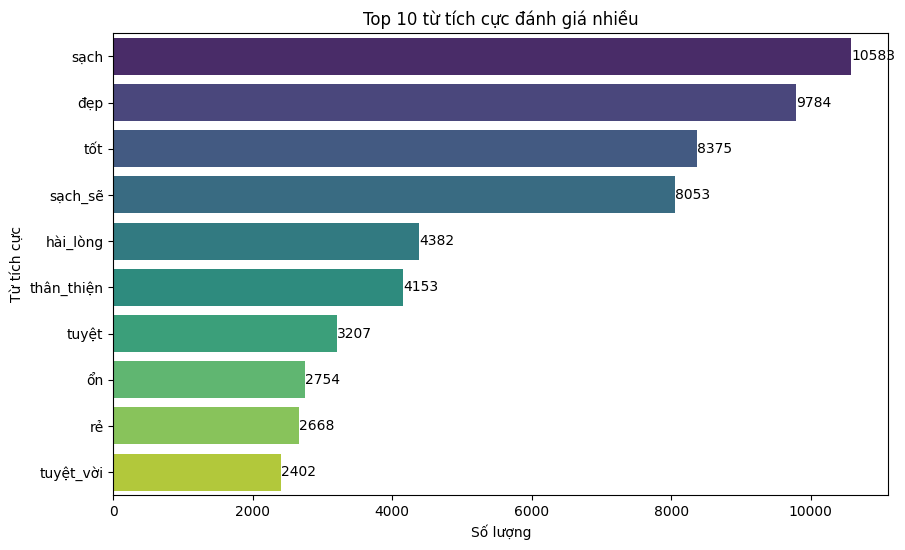

In [85]:
data['positive_words_str'] = data['positive_words'].apply(lambda x: ','.join(x))

# Gom tất cả các chuỗi lại thành một chuỗi văn bản lớn duy nhất
positive_words_str = data['positive_words_str'].tolist()

#Loại bỏ các ''
filtered_data = list(filter(None, positive_words_str))

#Tách cụm thành các từ riêng lẻ
separated_words = []
for phrase in filtered_data:
    separated_words.extend(phrase.split(','))

# Loại bỏ khoảng trắng thừa và kết hợp lại thành một chuỗi
cleaned_words = [word.strip() for word in separated_words]

#Đếm số lượng từ xuất hiện
word_counts = Counter(cleaned_words)

# Lấy 10 từ xuất hiện nhiều nhất
common_words = word_counts.most_common(10)

# Tạo DataFrame để vẽ biểu đồ
positive_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Word', data=positive_words_df, palette='viridis')
# Thêm số lượng trên đỉnh mỗi cột
for index, value in enumerate(positive_words_df['Count']):
    plt.text(value, index, str(value), color='black', ha="left", va="center")
plt.title('Top 10 từ tích cực đánh giá nhiều')
plt.xlabel('Số lượng')
plt.ylabel('Từ tích cực')
plt.show()

### Vẽ biểu đô xem 10 từ negative xuất hiện nhiều

<ipython-input-86-14e6b2c428a7>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=negative_words_str, palette='viridis')


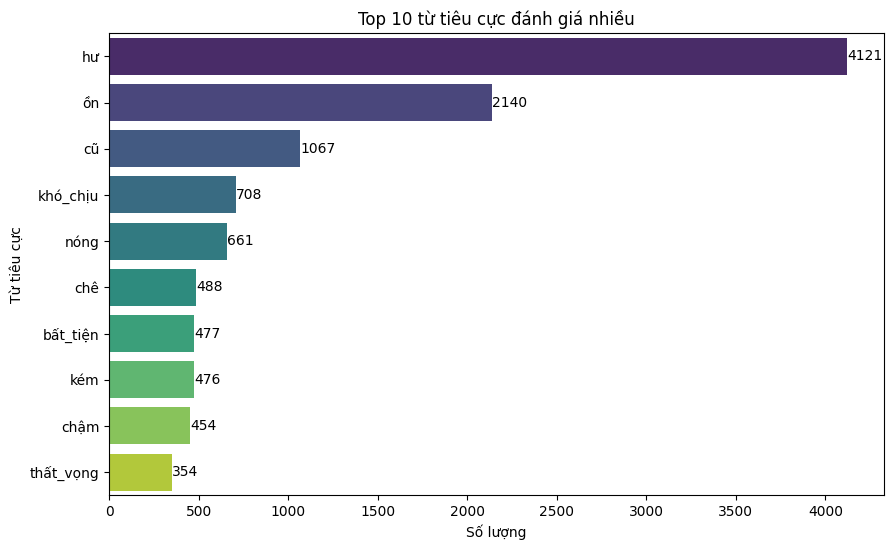

In [86]:
data['negative_words_str'] = data['negative_words'].apply(lambda x: ','.join(x))

# Gom tất cả các chuỗi lại thành một chuỗi văn bản lớn duy nhất
negative_words_str = data['negative_words_str'].tolist()

#Loại bỏ các ''
filtered_data = list(filter(None, negative_words_str))

#Tách cụm thành các từ riêng lẻ
separated_words = []
for phrase in filtered_data:
    separated_words.extend(phrase.split(','))

# Loại bỏ khoảng trắng thừa và kết hợp lại thành một chuỗi
cleaned_words = [word.strip() for word in separated_words]

#Đếm số lượng từ xuất hiện
word_counts = Counter(cleaned_words)

# Lấy 10 từ xuất hiện nhiều nhất
common_words = word_counts.most_common(10)

# Tạo DataFrame để vẽ biểu đồ
negative_words_str = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Word', data=negative_words_str, palette='viridis')
# Thêm số lượng trên đỉnh mỗi cột
for index, value in enumerate(negative_words_str['Count']):
    plt.text(value, index, str(value), color='black', ha="left", va="center")
plt.title('Top 10 từ tiêu cực đánh giá nhiều')
plt.xlabel('Số lượng')
plt.ylabel('Từ tiêu cực')
plt.show()

In [87]:
data = data.drop(['negative_words_str', 'positive_words_str'], axis=1)
data.head(2)

,Hotel ID,Nationality,Group Name,Room Type,Score,Body,Stay,year,month,Body_pre_remove,positive_words,negative_words,positive_count,negative_count,Tag
0,1_1,Nhật Bản,Cặp đôi,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,"Tôi đã ở cùng chủ nhân trong 4 đêm. Nhân viên rất thân thiện. Tầm nhìn từ phòng nhìn ra biển rộng lớn và tôi đã cảm động mỗi lần nhìn. Đặc biệt là bình minh rất tuyệt vời. Vì vậy, tôi khuyên bạn nên chọn phòng với tầm nhìn ra đại dương. Bãi biển chỉ cách đường băng qua đường. Hồ bơi rộng và rất thoải mái. Bữa sáng buffet có nhiều loại thức ăn và rất thú vị. Tôi đã dùng dịch vụ phòng ăn cho mỗi bữa ăn vì tôi lười đi ra ngoài. Trứng chiên cơm rất ngon. Tuy nhiên, khi đặt hàng, không có ai nói được tiếng Anh, vì vậy tôi phải gọi điện thoại và mỗi lần có người nói được tiếng Anh đến phòng. Tôi muốn ở lại đây nếu tôi quay lại Nha Trang. Cảm ơn nhân viên rất nhiều.",3,2023,7,chủ_nhân đêm thân_thiện tầm phòng biển rộng_lớn cảm_động bình tuyệt_vời khuyên phòng tầm bãi biển đường_băng đường hồ bơi rộng thoải_mái bữa thức_ăn thú_vị dịch_vụ phòng bữa lười đi trứng chiên cơm nhiên đặt_hàng tiếng điện_thoại tiếng,"[tuyệt_vời, thú_vị, thân_thiện, cảm_động, tuyệt, thoải_mái]",[],6,0,Positive
1,1_1,Việt Nam,Đi công tác,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,Lựa chọn Mường Thanh vì giá cả phù hợp. Đặt Online được nhiều ưu đãi. Bữa sáng khá phong phú và đầy đủ dưỡng chất. Món cà ri Tôm khách sạn mời rất ngon. Sinh nhật tôi được bạn Hồng chúc mừng sinh nhật và tạo bất ngờ tại phòng. Món nước welcome tại sảnh khi được check in các bạn mời rất ngon. Mỗi lần xuống sảnh đều uống các bạn đều nhiệt tình mời thêm. Các bạn Bell rất dể thương luôn giao tiếp và chào khách tại sảnh. Một nơi đáng lưu trú,1,2022,9,lựa_chọn mường giá_cả online ưu_đãi bữa đầy_đủ dưỡng chất món cà_tôm khách_sạn mời nhật hồng_chúc mừng_nhật phòng món sảnh mời sảnh uống nhiệt_tình mời dể_thương tiếp chào_khách lưu_trú,[đầy_đủ],"[ồn, hư]",1,2,Neutral
2,1_1,Việt Nam,Cặp đôi,Deluxe Hướng biển giường đôi,9.2,"Lần này đến với Nha Trang, tôi book phòng tại khách sạn Mường Thanh Luxury. Khách sạn trên đường Trần Phú, có view rất chill và thuận lợi để tắm biển. Nhân viên quầy lễ tân niềm nở, tận tình hướng dẫn, thủ tục nhận phòng đơn giản và nhanh chóng. Phòng ốc sạch sẽ đầy đủ tiện nghi, duy chỉ có thang máy lên xuống có vẻ hơi cũ kỹ và thường phải chờ đợi rất lâu. Ăn sáng tại khách sạn thì món ăn phong phú, nhưng lại không có các món đặc sản vùng miền như bún cá, nem nướng, bánh căn, bánh hỏi lòng heo các loại.",1,2024,6,phòng khách_sạn khách_sạn đường trần_phú thuận_lợi tắm biển quầy niềm_nở tận_tình hướng_dẫn thủ_tục phòng đơn_giản phòng_ốc sạch_sẽ đầy_đủ tiện máy hơi cũ_kỹ chờ_đợi khách_sạn món ăn_phú món đặc_sản vùng_miền bún cá nướng bánh bánh hỏi_lòng,"[sạch_sẽ, sạch, đầy_đủ, niềm_nở]","[cũ, hư, cũ_kỹ, chờ_đợi]",4,4,Neutral
3,1_1,Việt Nam,Gia đình có em bé,Deluxe Hướng biển giường đôi,8.8,"Hôm đi đến lúc về thì mọi thứ trong Khách sạn điều tuyết vời, Nhân viên đón tiép nhiệt tình, tiện nghi đầy đủ. Có trường hợp bữa đi du lịch ở Khách sạn thì dụng cụ trong phòng tắm bữa đầu điều có đầy đủ nhưng ngày 2 và ngày 3 không thấy bỏ thêm dụng cụ cho những ngày đó. Nên chỉ có ý kiến ở vấn đề này. Cảm ơn nhân viên và Khách sạn đã phục vụ nhiệt tình cho khách đi du lịch tại Nha Trang",3,2024,6,hôm đi khách_sạn điều_tuyết vời đón tiép nhiệt_tình_tiện trường_hợp bữa đi lịch khách_sạn dụng_cụ phòng tắm bữa đầu đầy_đủ dụng_cụ ý_kiến khách_sạn phục_vụ nhiệt_tình đi lịch,"[phục_vụ, đầy_đủ]",[],2,0,Neutral
4,1_1,Việt Nam,Cặp đôi,Deluxe 2 giường Hướng phố,9.2,"Khách sạn có vị trí trung tâm và sát biển. Nhân viên vui vẻ, thân thiện, mình check-in gặp bạn tiếp tân tên Lĩnh và bạn nhận hành lý tên Hiếu hỗ trợ rất nhiệt tình ! Phòng khách sạn rộng rãi , thoáng, phòng view biển quá đẹp ! Điều mình không thích lắm là nhà hàng ăn sáng hơi nóng, đi đâu phải chờ thang máy khá lâu và bên trong thang máy không có máy lạnh. Lần sau đến Nha Trang mình cũng sẽ quay lại ks này.",1,2024,6,khách_

In [88]:
data.groupby('Tag').count()

,Hotel ID,Nationality,Group Name,Room Type,Score,Body,Stay,year,month,Body_pre_remove,positive_words,negative_words,positive_count,negative_count
Tag,,,,,,,,,,,,,,
Negative,2646,2646,2646,2646,2646,2646,2646,2646,2646,2646,2646,2646,2646,2646
Neutral,16229,16229,16229,16229,16229,16229,16229,16229,16229,16229,16229,16229,16229,16229
Positive,22473,22473,22473,22473,22473,22473,22473,22473,22473,22473,22473,22473,22473,22473


In [89]:
data_pre = data[['Group Name', 'Room Type', 'Tag', 'Body_pre_remove']]
data_pre.head()

,Group Name,Room Type,Tag,Body_pre_remove
0,Cặp đôi,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,Positive,chủ_nhân đêm thân_thiện tầm phòng biển rộng_lớn cảm_động bình tuyệt_vời khuyên phòng tầm bãi biển đường_băng đường hồ bơi rộng thoải_mái bữa thức_ăn thú_vị dịch_vụ phòng bữa lười đi trứng chiên cơm nhiên đặt_hàng tiếng điện_thoại tiếng
1,Đi công tác,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,Neutral,lựa_chọn mường giá_cả online ưu_đãi bữa đầy_đủ dưỡng chất món cà_tôm khách_sạn mời nhật hồng_chúc mừng_nhật phòng món sảnh mời sảnh uống nhiệt_tình mời dể_thương tiếp chào_khách lưu_trú
2,Cặp đôi,Deluxe Hướng biển giường đôi,Neutral,phòng khách_sạn khách_sạn đường trần_phú thuận_lợi tắm biển quầy niềm_nở tận_tình hướng_dẫn thủ_tục phòng đơn_giản phòng_ốc sạch_sẽ đầy_đủ tiện máy hơi cũ_kỹ chờ_đợi khách_sạn món ăn_phú món đặc_sản vùng_miền bún cá nướng bánh bánh hỏi_lòng
3,Gia đình có em bé,Deluxe Hướng biển giường đôi,Neutral,hôm đi khách_sạn điều_tuyết vời đón tiép nhiệt_tình_tiện trường_hợp bữa đi lịch khách_sạn dụng_cụ phòng tắm bữa đầu đầy_đủ dụng_cụ ý_kiến khách_sạn phục_vụ nhiệt_tình đi lịch
4,Cặp đôi,Deluxe 2 giường Hướng phố,Positive,khách_sạn vị_trí_tâm sát biển vẻ thân_thiện tiếp_tân lĩnh hành_lý hiếu nhiệt_tình phòng khách_sạn rộng_rãi thoáng phòng biển đẹp không_thích lắm nhà_hàng hơi nóng đi chờ máy máy


## Chuẩn bị train_data, test_data

### Xử lý imbalance bằng Oversampling

In [90]:
from sklearn.utils import resample
# Tách riêng các lớp
class_0 = data_pre[data_pre['Tag'] == 'Positive']
class_1 = data_pre[data_pre['Tag'] == 'Neutral']
class_2 = data_pre[data_pre['Tag'] == 'Negative']

# Đếm số lượng mẫu của từng lớp
count_0 = len(class_0)
count_1 = len(class_1)
count_2 = len(class_2)

# Tìm lớp chiếm đa số
max_count = max(count_0, count_1, count_2)

# Resample các lớp
sampled_class_0 = resample(class_0, replace=True, n_samples=max_count, random_state=42)
sampled_class_1 = resample(class_1, replace=True, n_samples=max_count, random_state=42)
sampled_class_2 = resample(class_2, replace=True, n_samples=max_count, random_state=42)

# Kết hợp các lớp lại thành DataFrame mới
final_data = pd.concat([sampled_class_0, sampled_class_1, sampled_class_2])

# Shuffle the dataset
final_data = final_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [91]:
final_data.groupby('Tag').count()

,Group Name,Room Type,Body_pre_remove
Tag,,,
Negative,22473,22473,22473
Neutral,22473,22473,22473
Positive,22473,22473,22473


In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_data['Body_pre_remove'], final_data['Tag'], test_size=0.3, random_state=42)

In [129]:
vectorizer = TfidfVectorizer()
train_X = vectorizer.fit_transform(X_train)

In [130]:
# Kiểm tra nếu tệp không tồn tại, thì lưu mô hình
p = '/content/gdrive/MyDrive/LDS0_k296_NgoTrieuPhu/Project_1/vec.pkl'

if not os.path.exists(p):
    # Lưu mô hình decision_tree
    with open(p, 'wb') as f:
        pickle.dump(vectorizer, f)
    print(f'Mô hình đã được lưu tại {p}')
else:
    print(f'Tệp {p} đã tồn tại.')

with open(p, 'rb') as f:
    vectorizer_new = pickle.load(f)

Mô hình đã được lưu tại /content/gdrive/MyDrive/LDS0_k296_NgoTrieuPhu/Project_1/vec.pkl


In [ ]:
test_X = vectorizer.transform(X_test)

## Xây dựng mô hình

In [94]:
detree = DecisionTreeClassifier()
start_time = time.time()
detree_model = detree.fit(train_X, y_train)
end_time = time.time()
y_pred_detree = detree_model.predict(test_X)
time_detree = end_time - start_time

In [95]:
knn = KNeighborsClassifier()
start_time = time.time()
knn_model = knn.fit(train_X, y_train)
end_time = time.time()
y_pred_knn = knn_model.predict(test_X)
time_knn = end_time - start_time

In [96]:
lg = LogisticRegression()
start_time = time.time()
lg_model = lg.fit(train_X, y_train)
end_time = time.time()
y_pred_lg = lg_model.predict(test_X)
time_lg = end_time - start_time

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [97]:
random = RandomForestClassifier()
start_time = time.time()
random_model = random.fit(train_X, y_train)
end_time = time.time()
y_pred_random = random_model.predict(test_X)
time_random = end_time - start_time

## Đánh giá các mô hình

In [98]:
report_detree = classification_report(y_pred_detree, y_test, digits=4)
print(time_detree)
print(report_detree)

5.586460828781128
              precision    recall  f1-score   support

    Negative     0.9502    0.9781    0.9639      6612
     Neutral     0.9319    0.9395    0.9357      6617
    Positive     0.9696    0.9353    0.9521      6997

    accuracy                         0.9507     20226
   macro avg     0.9506    0.9510    0.9506     20226
weighted avg     0.9509    0.9507    0.9506     20226



In [99]:
report_knn = classification_report(y_pred_knn, y_test, digits=4)
print(time_knn)
print(report_knn)

0.14099740982055664
              precision    recall  f1-score   support

    Negative     0.9427    0.9723    0.9573      6599
     Neutral     0.9249    0.7731    0.8422      7981
    Positive     0.7657    0.9153    0.8339      5646

    accuracy                         0.8778     20226
   macro avg     0.8778    0.8869    0.8778     20226
weighted avg     0.8863    0.8778    0.8774     20226



In [100]:
report_lg = classification_report(y_pred_lg, y_test, digits=4)
print(time_lg)
print(report_lg)

7.31388521194458
              precision    recall  f1-score   support

    Negative     0.9048    0.9208    0.9127      6688
     Neutral     0.8005    0.8237    0.8119      6483
    Positive     0.8840    0.8456    0.8644      7055

    accuracy                         0.8634     20226
   macro avg     0.8631    0.8634    0.8630     20226
weighted avg     0.8641    0.8634    0.8635     20226



In [101]:
report_random = classification_report(y_pred_random, y_test, digits=4)
print(time_random)
print(report_random)

54.978633642196655
              precision    recall  f1-score   support

    Negative     0.9496    0.9873    0.9681      6546
     Neutral     0.9370    0.9488    0.9429      6588
    Positive     0.9827    0.9351    0.9583      7092

    accuracy                         0.9565     20226
   macro avg     0.9564    0.9571    0.9564     20226
weighted avg     0.9571    0.9565    0.9565     20226



## Chọn Decision Tree vì accuracy chênh lệch không đáng kể với Random Forest tương đối tốt và thời gian tốt hơn gấp 10 lần


In [133]:
# Kiểm tra nếu tệp không tồn tại, thì lưu mô hình
p = '/content/gdrive/MyDrive/LDS0_k296_NgoTrieuPhu/Project_1/model.pkl'

if not os.path.exists(p):
    # Lưu mô hình decision_tree
    with open(p, 'wb') as f:
        pickle.dump(detree_model, f)
    print(f'Mô hình đã được lưu tại {p}')
else:
    print(f'Tệp {p} đã tồn tại.')

with open(p, 'rb') as f:
    detree_model_new = pickle.load(f)

Mô hình đã được lưu tại /content/gdrive/MyDrive/LDS0_k296_NgoTrieuPhu/Project_1/model.pkl



## Dự đoán mới

In [117]:
string = '''Vc mình ở đây 2 đêm và k hài lòng về ks .MT này nằm ở vị trí đắc địa,
ngay trước biển và ngay khu phố trung tâm, nhộn nhịp và dễ đi lại.
Về phòng ốc thì mình ở phòng view thành phố nhưng do săn đc giá tốt nên cũng rất hài lònggggggg 💚💚💚.
Phòng sạch sẽ, tiện nghi và thoải mái, đặc biệt rất là thích ghế sofa để relax trong phòng.
Nhân viên thật sự chu đáo và nhẹ nhàng.
Dù không phải là khách sạn cực hiện đại và lộng lẫy nhưng xét về tổng thể với ks 4 sao thì rất hài lòng!'''

In [151]:
document = process_text(string)
document

'mình ở đây đêm và k hài lòng về này nằm ở vị trí đắc địa trước biển và phố tâm nhộn nhịp và dễ đi lại. về phòng ốc thì mình ở phòng thành phố nhưng săn đc giá tốt nên cũng rất hài lònggggggg. phòng sạch sẽ tiện và thoải mái đặc biệt rất là thích ghế để phòng. nhân viên thật sự đáo và nhẹ nhàng. dù không phải là khách sạn cực hiện đại và lộng lẫy nhưng xét về tổng thể với thì rất hài lòng.'

In [152]:
document = covert_unicode(document)
document

'mình ở đây đêm và k hài lòng về này nằm ở vị trí đắc địa trước biển và phố tâm nhộn nhịp và dễ đi lại. về phòng ốc thì mình ở phòng thành phố nhưng săn đc giá tốt nên cũng rất hài lònggggggg. phòng sạch sẽ tiện và thoải mái đặc biệt rất là thích ghế để phòng. nhân viên thật sự đáo và nhẹ nhàng. dù không phải là khách sạn cực hiện đại và lộng lẫy nhưng xét về tổng thể với thì rất hài lòng.'

In [153]:
document = process_special_word(document)
document

'mình ở đây đêm và k hài lòng về này nằm ở vị trí đắc địa trước biển và phố tâm nhộn nhịp và dễ đi lại. về phòng ốc thì mình ở phòng thành phố nhưng săn đc giá tốt nên cũng rất hài lònggggggg. phòng sạch sẽ tiện và thoải mái đặc biệt rất là thích ghế để phòng. nhân viên thật sự đáo và nhẹ nhàng. dù không_phải là khách sạn cực hiện đại và lộng lẫy nhưng xét về tổng thể với thì rất hài lòng.'

In [154]:
document = normalize_repeated_characters(document)
document

'mình ở đây đêm và k hài lòng về này nằm ở vị trí đắc địa trước biển và phố tâm nhộn nhịp và dễ đi lại. về phòng ốc thì mình ở phòng thành phố nhưng săn đc giá tốt nên cũng rất hài lòng. phòng sạch sẽ tiện và thoải mái đặc biệt rất là thích ghế để phòng. nhân viên thật sự đáo và nhẹ nhàng. dù không_phải là khách sạn cực hiện đại và lộng lẫy nhưng xét về tổng thể với thì rất hài lòng.'

In [155]:
document = process_postag_thesea(document)
document

'đêm k hài_lòng nằm vị_trí đắc_địa biển phố_tâm nhộn_nhịp dễ phòng_ốc phòng thành_phố săn đc giá tốt cũng rất hài_lòng phòng sạch_sẽ tiện thoải_mái đặc_biệt rất là thích ghế phòng nhân_viên thật_sự_đáo không_phải là khách_sạn cực hiện_đại lộng_lẫy xét tổng_thể rất hài_lòng'

In [156]:
document = remove_stopword(document, stopwords_lst)
document

'đêm k hài_lòng nằm đắc_địa biển phố_tâm nhộn_nhịp phòng_ốc phòng thành_phố săn đc giá tốt hài_lòng phòng sạch_sẽ tiện thoải_mái thích ghế phòng thật_sự_đáo khách_sạn cực hiện_đại lộng_lẫy xét tổng_thể hài_lòng'

In [157]:
document = [document]
document_new = vectorizer_new.transform(document)
y_pred_new = detree_model_new.predict(document_new)
print(y_pred_new)

['Positive']


## Cung cấp các thông tin cho chủ khách sạn

In [110]:
hotel_profile = pd.read_csv('/content/gdrive/MyDrive/LDS0_k296_NgoTrieuPhu/Project_1/Data_Agoda_raw/hotel_profiles.csv', encoding="utf-8")
hotel_profile.drop(['num', 'Total Score', 'Vị trí', 'Độ sạch sẽ', 'Dịch vụ', 'Tiện nghi', 'Đáng giá tiền', 'Sự thoải mái và chất lượng phòng'], axis=1, inplace=True)
hotel_profile.head()

,Hotel ID,Hotel Name,Hotel Rank,Hotel Address
0,1_1,Khách sạn Mường Thanh Luxury Nha Trang (Muong Thanh Luxury Nha Trang Hotel),5 sao trên 5,"60 Trần Phú, Lộc Thọ, Nha Trang, Việt Nam"
1,1_2,ALPHA BIRD NHA TRANG,4 sao trên 5,"51/19/37 Tue Tinh St, Loc Tho Ward, Nha Trang, Lộc Thọ, Nha Trang, Việt Nam, 650000"
2,1_3,Khách sạn Aaron (Aaron Hotel),3.5 sao trên 5,"6Trần Quang Khải, Lộc Thọ, Nha Trang, Việt Nam, 65000"
3,1_4,Panorama Star Beach Nha Trang,5 sao trên 5,"02 Nguyen Thi Minh Khai, Lộc Thọ, Nha Trang, Việt Nam, 650000"
4,1_5,Khách sạn Balcony Nha Trang (Balcony Nha Trang Hotel),4 sao trên 5,"98B/13 Trần Phú, Lộc Thọ, Nha Trang, Việt Nam"


In [111]:
def get_hotel_id(hotel_name):
    # Xử lý các ký tự đặc biệt trong tên khách sạn
    escaped_hotel_name = re.escape(hotel_name)

    # Tìm kiếm hàng phù hợp với tên khách sạn
    match = hotel_profile[hotel_profile['Hotel Name'].str.contains(escaped_hotel_name, case=False, na=False, regex=True)]

    if not match.empty:
        return match['Hotel ID'].values[0]
    else:
        return 'Hotel not found'

In [112]:
a = 'Khách sạn Mường Thanh Luxury Nha Trang (Muong Thanh Luxury Nha Trang Hotel'
print('     Thông tin tổng quan   ')
hotel_id = get_hotel_id(a)
grouped_mean = data[data['Hotel ID'] == hotel_id]['Score'].mean()
grouped_count = data[data['Hotel ID'] == hotel_id]['Hotel ID'].count()
print('Tổng số lượng đánh giá: ',grouped_count)
print('Điểm số trung bình của khách sạn: ',grouped_mean)

     Thông tin tổng quan   
Tổng số lượng đánh giá:  1115
Điểm số trung bình của khách sạn:  9.38403587443946


In [113]:
print('-----------------------------------------------')

print('     Phân tích quốc tịch và thời gian lưu trú   ')
score_national = data[data['Hotel ID'] == hotel_id].groupby('Nationality')['Score'].mean()
time_national = data[data['Hotel ID'] == hotel_id].groupby('Nationality')['Stay'].mean()
print('Điểm số trung bình theo quốc tịch: ', score_national)
print('Thời gian lưu trú trung bình: ', time_national)

-----------------------------------------------
     Phân tích quốc tịch và thời gian lưu trú   
Điểm số trung bình theo quốc tịch:  Nationality
Hoa Kỳ         9.550000
Nhật Bản      10.000000
Trung Quốc     9.200000
Việt Nam       9.379209
Name: Score, dtype: float64
Thời gian lưu trú trung bình:  Nationality
Hoa Kỳ        2.437500
Nhật Bản      3.000000
Trung Quốc    1.000000
Việt Nam      1.798528
Name: Stay, dtype: float64


In [114]:
print('-----------------------------------------------')

print('     Thông tin chi tiết theo loại phòng và nhóm khách')
room_score = data[data['Hotel ID'] == hotel_id].groupby('Room Type')['Score'].mean()
group_score = data[data['Hotel ID'] == hotel_id].groupby('Group Name')['Score'].mean()
print('Phân tích điểm số trung bình theo từng loại phòng: ', room_score.head(4))
print('Phân tích điểm số theo nhóm khách: ', group_score)


-----------------------------------------------
     Thông tin chi tiết theo loại phòng và nhóm khách
Phân tích điểm số trung bình theo từng loại phòng:  Room Type
Deluxe 2 giường Hướng phố       9.540385
Deluxe Hướng biển giường đôi    9.403344
Deluxe giường đôi Hướng phố     9.412935
Executive Suite                 9.032258
Name: Score, dtype: float64
Phân tích điểm số theo nhóm khách:  Group Name
Cặp đôi               9.440323
Du lịch một mình      9.553488
Gia đình có em bé     9.320202
Gia đình có trẻ em    9.377391
Nhóm                  9.365766
Đi công tác           9.481319
Name: Score, dtype: float64


In [115]:
print('-----------------------------------------------')
filtered_df = data[data['Hotel ID'] == hotel_id]
score_month_year = filtered_df.groupby(['year', 'month'])['Score'].mean().reset_index()
print('     Đánh giá điểm số theo thời gian\n', score_month_year)

-----------------------------------------------
     Đánh giá điểm số theo thời gian
     year  month      Score
0   2020      6   9.200000
1   2020      7   9.600000
2   2020      9  10.000000
3   2021      4   8.000000
4   2022      2   8.200000
5   2022      4   9.600000
6   2022      5   9.781818
7   2022      6  10.000000
8   2022      7   8.400000
9   2022      8  10.000000
10  2022      9  10.000000
11  2022     11   8.400000
12  2022     12  10.000000
13  2023      1   9.397436
14  2023      2   9.866667
15  2023      3   9.485714
16  2023      4   9.500000
17  2023      5   7.600000
18  2023      6   9.433333
19  2023      7   9.502703
20  2023      8  10.000000
21  2023      9  10.000000
22  2023     10   9.492308
23  2023     11  10.000000
24  2023     12   9.629851
25  2024      1   9.612903
26  2024      2   9.386802
27  2024      3   9.000000
28  2024      4   9.040000
29  2024      5   9.500000
30  2024      6   8.992000
31  2024      7   8.500000
